In [2]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages")

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

In [87]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [88]:
y_train=y_train.reshape(-1,)


In [89]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


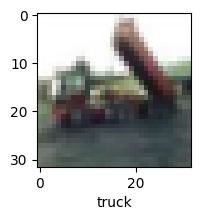

In [31]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train,y_train,2)

In [90]:
x_train, x_test= x_train/255, x_test/255
x_train.shape

(50000, 32, 32, 3)

## Example with Artificial Neural Network (ANN) code, which achieves pretty low accuracy for the CIFAR-10.

In [39]:
nn=models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    layers.Flatten(),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

In [40]:
nn.compile(optimizer=tf.keras.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [41]:
nn.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.2556 - loss: 1.9989
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3837 - loss: 1.7033
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4232 - loss: 1.6109
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4480 - loss: 1.5359
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4709 - loss: 1.4768


## Performance is around 47% for our ANN after 5 epochs. Not so good.

## Now lets try a Convolutional Neural Network (CNN).

In [118]:
cnn=models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    #Special CNN Sauce
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),

    #Boring Dense stuff
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax")
])

In [119]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [120]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2841 - loss: 1.9054
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4980 - loss: 1.4000
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5686 - loss: 1.2293
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6029 - loss: 1.1419
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6220 - loss: 1.0851
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6492 - loss: 1.0129
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6628 - loss: 0.9648
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6720 - loss: 0.9366
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6807 - loss: 0.9057
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6927 - loss: 0.8766


In [121]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6917 - loss: 0.8903


[0.8984783887863159, 0.6913999915122986]

In [129]:
predictions=cnn.predict(x_test)
y_classes=[np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [138]:
y_classes[:5]

[3, 8, 8, 8, 6]

In [139]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)